Load Data

In [16]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [17]:
#assign data and target (class label)
x = iris.data
y = iris.target

#print the first 10 rows of data
print(x[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [18]:
#print the last 10 rows of data
print(x[-10:])

[[6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


Visualizing Data

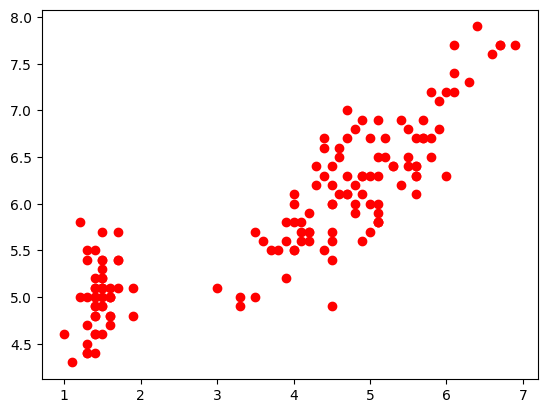

In [19]:
import matplotlib.pyplot as plt

plt.plot(x[:, 2], x[:, 0], 'ro')
plt.show()

Text(0.5, 1.0, 'Iris Dataset')

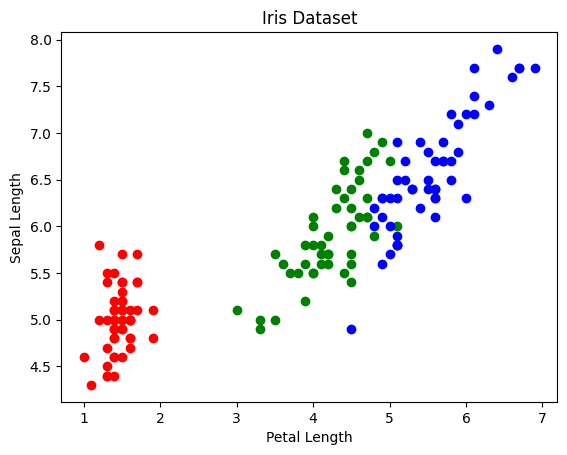

In [20]:
plt.plot(x[y[:]==0, 2], x[y[:]==0, 0], 'ro')
plt.plot(x[y[:]==1, 2], x[y[:]==1, 0], 'go')
plt.plot(x[y[:]==2, 2], x[y[:]==2, 0], 'bo')

#labels
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Iris Dataset')

Splitting the data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 33, random_state=1)
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

(117, 4)
(33, 4)
(117,)
(33,)


Build the model

In [22]:
#decision tree classifier
from sklearn import tree
classifier = tree.DecisionTreeClassifier(random_state=1)

Train the model

In [23]:
clf=classifier.fit(x_train, y_train)

Display the model

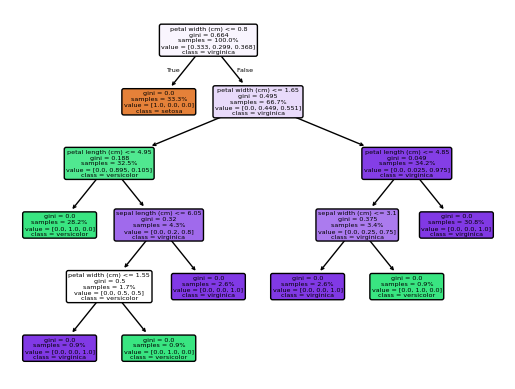

In [28]:
#version 1
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True,proportion=True)
plt.show()

In [29]:
prediction = classifier.predict(x_test)
print("Prediction for test data")
print(prediction)
print("Actual values for test data")
print(y_test)

Prediction for test data
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1]
Actual values for test data
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1]


Calculation accuracy

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy is")
print(accuracy_score(y_test, prediction))

Accuracy is
0.9696969696969697


In [31]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, prediction))

Confusion Matrix
[[11  0  0]
 [ 0 14  1]
 [ 0  0  7]]


Precision, Recall and F1 Score

In [32]:
from sklearn.metrics import classification_report
target_names = ['Setosa', 'Versicolor', 'Virginica']
print(classification_report(y_test, prediction, target_names=target_names))  

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.93      0.97        15
   Virginica       0.88      1.00      0.93         7

    accuracy                           0.97        33
   macro avg       0.96      0.98      0.97        33
weighted avg       0.97      0.97      0.97        33



In [33]:
#final Model
clf = classifier.fit(x, y)

In [ ]:
#display the final model
import pydotplus
from IPython.display import Image
gini_dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True,proportion=True)
with open("iris_tree.dot") as f:
    f.write(gini_dot_data)
#now convert the .dot file to .png using command line
#dot -Tpng iris_tree.dot -o iris_tree.png
#display the image
Image(filename='iris_tree.png',width=600)


In [34]:
#make a single prediction
print("Single Prediction")
clf = classifier.fit(x, y)
row = [[5.1, 3.5, 1.4, 0.2]]
yhat = clf.predict(row)
print(f'Predicted Class: {yhat[0]:d}')

Single Prediction
Predicted Class: 0
